# Import Dependencies

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load Dataset

In [2]:
data = pd.read_excel('Churn.xlsx',index_col=0)
data.head(20)

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
6,AL,area_code_510,118,no,0,yes,6.3,6,1.70,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,0,no
7,MA,area_code_510,121,yes,24,no,7.5,7,2.03,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,3,no
8,MO,area_code_415,147,no,0,yes,7.1,6,1.92,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,0,no
9,LA,area_code_408,117,no,0,no,8.7,4,2.35,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,1,no
10,WV,area_code_415,141,yes,37,yes,11.2,5,3.02,258.6,84,43.96,222,111,18.87,326.4,97,14.69,0,no


●	state: Categorical, for the 51 states and the District of Columbia.

●	Area.code

●	account.length: how long the account has Business Objective: Customer churn is a big problem for telecommunications companies. Indeed, their annual churn rates are usually higher than 10%. For that reason, they develop strategies to keep as many clients as possible. This is a classification project since the variable to be predicted is binary (churn or loyal customer). The goal here is to model churn probability, conditioned on the customer features. telecommunications 


●	been active.

●	voice.plan: yes or no, voicemail plan.

●	voice.messages: number of voicemail messages.

●	intl.plan: yes or no, international plan.

●	intl.mins: minutes customer used service to make international calls.

●	intl.calls: total number of international calls.

●	intl.charge: total international charge.

●	day.mins: minutes customer used service during the day.

●	day.calls: total number of calls during the day.

●	day.charge: total charge during the day.

●	eve.mins: minutes customer used service during the evening.

●	eve.calls: total number of calls during the evening.

●	eve.charge: total charge during the evening.

●	night.mins: minutes customer used service during the night.

●	night.calls: total number of calls during the night.

●	night.charge: total charge during the night.

●	customer.calls: number of calls to customer service.

●	churn: Categorical, yes or no. Indicator of whether the customer has left the company (yes or no).


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   float6

In [4]:
data['eve.mins'] = data['eve.mins'].astype('float64') 
data['day.charge'] = data['day.charge'].astype('float64') 


In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4993.000000,4976.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,30.653501,200.580326,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,9.166356,50.554637,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.275000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


### Churn Distribution

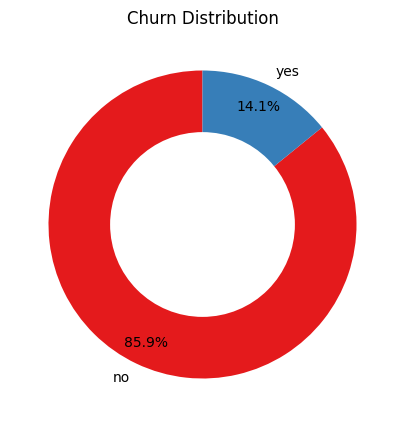

In [7]:
# Data preparation
churn_counts = data['churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values
colors = sns.color_palette('Set1')

# Creating the donut chart
plt.figure(figsize=(15,5))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', pctdistance=0.85)

# Creating a circle at the center to make it look like a donut
center_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Adding title
plt.title('Churn Distribution')

# Display the chart
plt.show()


### State Count by Churn Status

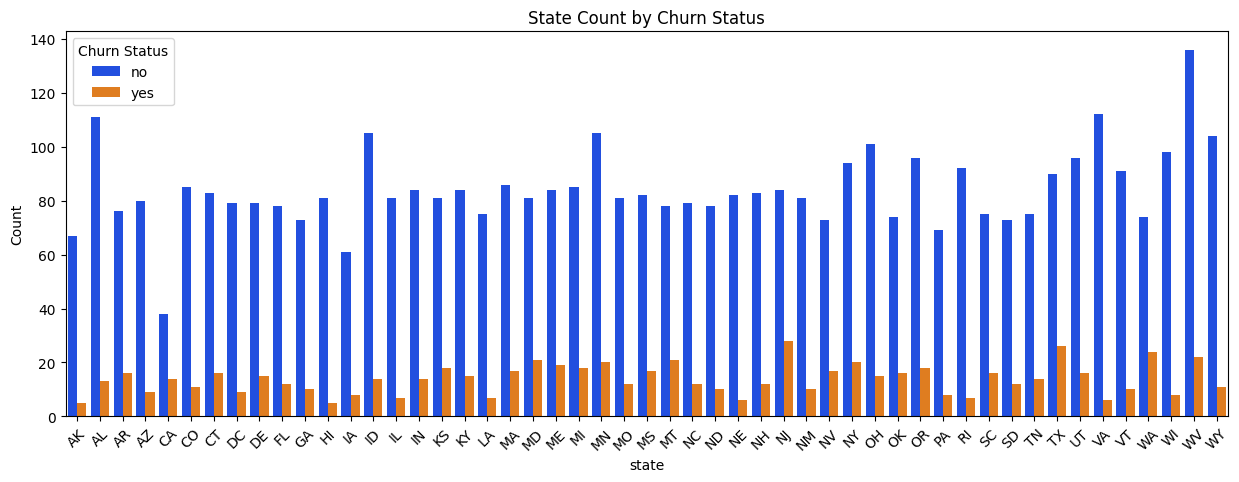

In [8]:
# Group by 'state' and 'churn' to get counts
state_churn_counts = data.groupby(['state', 'churn']).size().reset_index(name='count')

# Create a figure
plt.figure(figsize=(15, 5))

# Create a barplot with hue
sns.barplot(data=state_churn_counts,
            x='state', 
            y='count', 
            hue='churn', 
            palette='bright')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("State Count by Churn Status")
plt.legend(title='Churn Status')  # Set the title for the legend
plt.show()

### Area Code Count by Churn Status

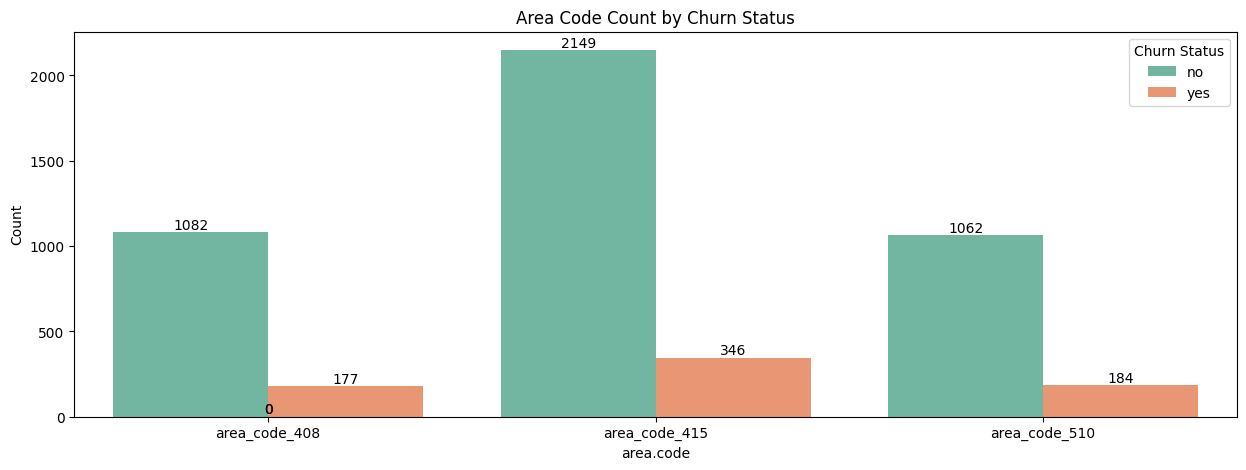

In [9]:
# Group by 'area.code' and 'churn' to get counts
area_churn_counts = data.groupby(['area.code', 'churn']).size().reset_index(name='count')

# Create a figure
plt.figure(figsize=(15, 5))

# Create a barplot with hue
bar_plot = sns.barplot(data=area_churn_counts,
            x='area.code', 
            y='count', 
            hue='churn', 
            palette='Set2')

# Rotate the x-axis labels for better readability
plt.ylabel("Count")
plt.title("Area Code Count by Churn Status")
plt.legend(title='Churn Status')  # Set the title for the legend

# Add text annotations
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',  # Display the count as an integer
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
                      ha='center',  # Horizontal alignment
                      va='bottom',  # Vertical alignment
                      fontsize=10,  # Font size
                      color='black')  # Text color

plt.show()


### Voice Plan Count by Churn Status

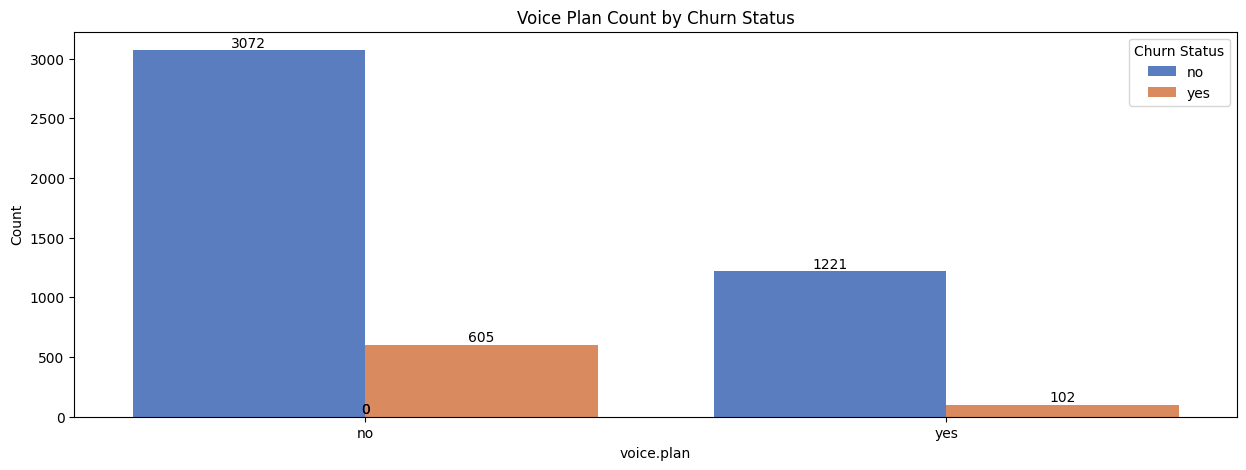

In [10]:
# Group by 'area.code' and 'churn' to get counts
area_churn_counts = data.groupby(['voice.plan', 'churn']).size().reset_index(name='count')

# Create a figure
plt.figure(figsize=(15, 5))

# Create a barplot with hue
bar_plot = sns.barplot(data=area_churn_counts,
            x='voice.plan', 
            y='count', 
            hue='churn', 
            palette='muted')

# Rotate the x-axis labels for better readability
plt.ylabel("Count")
plt.title("Voice Plan Count by Churn Status")
plt.legend(title='Churn Status')  # Set the title for the legend

# Add text annotations
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',  # Display the count as an integer
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
                      ha='center',  # Horizontal alignment
                      va='bottom',  # Vertical alignment
                      fontsize=10,  # Font size
                      color='black')  # Text color

plt.show()


### INTL Plan Count by Churn Status

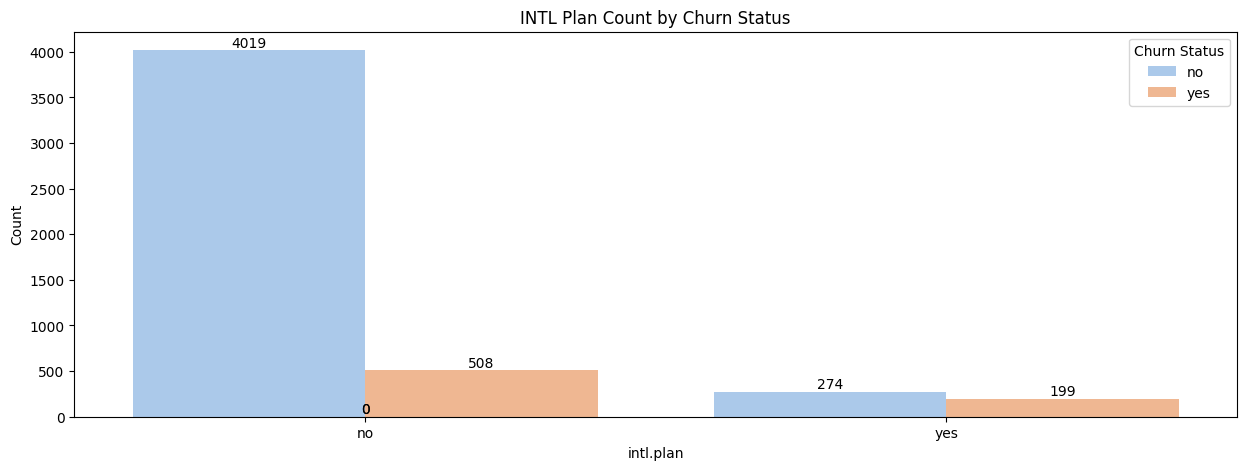

In [11]:
# Group by 'area.code' and 'churn' to get counts
area_churn_counts = data.groupby(['intl.plan', 'churn']).size().reset_index(name='count')

# Create a figure
plt.figure(figsize=(15, 5))

# Create a barplot with hue
bar_plot = sns.barplot(data=area_churn_counts,
            x='intl.plan', 
            y='count', 
            hue='churn', 
            palette='pastel')

# Rotate the x-axis labels for better readability
plt.ylabel("Count")
plt.title("INTL Plan Count by Churn Status")
plt.legend(title='Churn Status')  # Set the title for the legend

# Add text annotations
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',  # Display the count as an integer
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
                      ha='center',  # Horizontal alignment
                      va='bottom',  # Vertical alignment
                      fontsize=10,  # Font size
                      color='black')  # Text color

plt.show()


### Check Data Distribution 

<Figure size 1500x800 with 0 Axes>

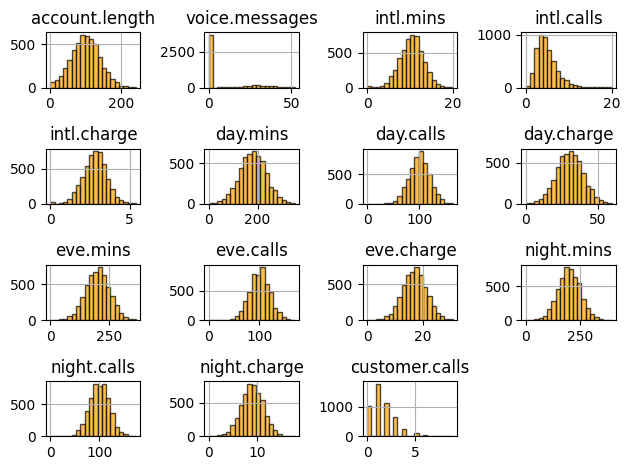

In [12]:

# Select numerical columns from the dataset
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for each numerical column
plt.figure(figsize=(15, 8))  # Set the figure size
data[numerical_columns].hist(bins=20, color='orange', edgecolor='black', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the histograms
plt.show()


In [13]:
data['voice.messages'].value_counts()

voice.messages
0     3678
31      83
28      67
29      67
33      66
24      64
27      64
30      58
26      58
32      57
23      52
25      51
22      47
36      45
37      43
39      42
34      41
35      41
21      41
38      41
20      32
40      28
19      27
41      22
17      21
42      19
18      18
16      17
43      16
15      13
45      11
12      11
14       9
44       9
46       8
48       5
13       4
47       4
10       4
49       3
6        2
9        2
50       2
11       2
8        2
4        1
51       1
52       1
Name: count, dtype: int64

### Remove Constant column

In [14]:
data.drop(columns='voice.messages',inplace=True)

### Find Outliers

In [15]:
def find_outliers_z_score(df, column, threshold=3):
    
    # Calculate the mean and standard deviation of the column
    mean = df[column].mean()
    std_dev = df[column].std()

    # Calculate the Z-score for each value
    z_scores = (df[column] - mean) / std_dev
    
    # Identify outliers
    outliers = df[np.abs(z_scores) > threshold]
    
    return outliers[column].tolist()

In [16]:
for column in data.select_dtypes(include=['int64','float64']).columns :
    print(column , ' : ' , find_outliers_z_score(data,column))
    print()
    

account.length  :  [224, 243, 232, 225, 225, 224, 221, 238, 222, 232, 233, 222]

intl.mins  :  [20.0, 0.0, 18.9, 0.0, 0.0, 0.0, 0.0, 1.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1, 0.0, 0.0, 0.0, 0.0, 0.0, 18.9, 0.0, 18.7, 0.0, 0.4, 19.3, 19.2, 0.0, 19.7, 0.0, 0.0, 0.0, 1.1, 19.7]

intl.calls  :  [19, 15, 12, 13, 12, 13, 12, 18, 12, 13, 12, 12, 15, 13, 15, 14, 13, 13, 13, 12, 14, 15, 18, 12, 13, 14, 12, 14, 15, 12, 16, 15, 14, 12, 13, 16, 13, 13, 15, 12, 13, 18, 12, 12, 12, 13, 13, 14, 20, 17, 13, 12, 19, 13, 12, 16, 16, 16, 12, 15, 16, 12, 12, 15, 12, 13, 13, 18, 13, 12, 17, 12, 16]

intl.charge  :  [5.4, 0.0, 5.1, 0.0, 0.0, 0.0, 0.0, 0.35, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 5.1, 0.0, 5.05, 0.0, 0.11, 5.21, 5.18, 0.0, 5.32, 0.0, 0.0, 0.0, 0.3, 5.32]

day.mins  :  [350.8, 346.8, 12.5, 0.0, 0.0, 7.9, 17.6, 345.3, 2.6, 7.8, 351.5, 6.6, 7.2]

day.calls  :  [163, 36, 40, 165, 30, 0, 0, 160, 35, 40, 34, 39, 160, 39]

day.charge  :  [59.64, 58.96, 2.13, 0

### Replace Outliers

In [17]:
def replace_outliers_with_random(data, column, z_threshold=3):
    """
    Replace outliers in the specified column with random integer values within the 
    lower and upper bounds.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    column (str): The name of the column to check for outliers.
    z_threshold (float): The Z-score threshold to define outliers.

    Returns:
    pd.Series: The column with outliers replaced by random integer values.
    """
    # Calculate the Z-scores
    mean = data[column].mean()
    std_dev = data[column].std()
    z_scores = (data[column] - mean) / std_dev

    # Identify outliers
    outliers = np.abs(z_scores) > z_threshold

    # Get the lower and upper bounds (excluding outliers)
    lower_bound = data[column][~outliers].min()
    upper_bound = data[column][~outliers].max()

    # Generate random values within the specified range and convert to integer
    data.loc[outliers, column] = np.random.randint(lower_bound, upper_bound + 1, size=outliers.sum())

    return data[column]

In [18]:
for i in range(3):
    for column in data.select_dtypes(include=['int64','float64']):
        print(f"Replacing outliers in column: {column}")
        replace_outliers_with_random(data, column)

Replacing outliers in column: account.length
Replacing outliers in column: intl.mins
Replacing outliers in column: intl.calls
Replacing outliers in column: intl.charge
Replacing outliers in column: day.mins
Replacing outliers in column: day.calls
Replacing outliers in column: day.charge
Replacing outliers in column: eve.mins
Replacing outliers in column: eve.calls
Replacing outliers in column: eve.charge
Replacing outliers in column: night.mins
Replacing outliers in column: night.calls
Replacing outliers in column: night.charge
Replacing outliers in column: customer.calls
Replacing outliers in column: account.length
Replacing outliers in column: intl.mins
Replacing outliers in column: intl.calls
Replacing outliers in column: intl.charge
Replacing outliers in column: day.mins
Replacing outliers in column: day.calls
Replacing outliers in column: day.charge
Replacing outliers in column: eve.mins
Replacing outliers in column: eve.calls
Replacing outliers in column: eve.charge
Replacing out

In [19]:
for column in data.select_dtypes(include=['int64','float64']).columns :
    print(column , ' : ' , find_outliers_z_score(data,column))
    print()
    

account.length  :  []

intl.mins  :  []

intl.calls  :  []

intl.charge  :  [0.0]

day.mins  :  []

day.calls  :  []

day.charge  :  []

eve.mins  :  []

eve.calls  :  []

eve.charge  :  []

night.mins  :  []

night.calls  :  []

night.charge  :  [15.71]

customer.calls  :  []



<Figure size 1500x800 with 0 Axes>

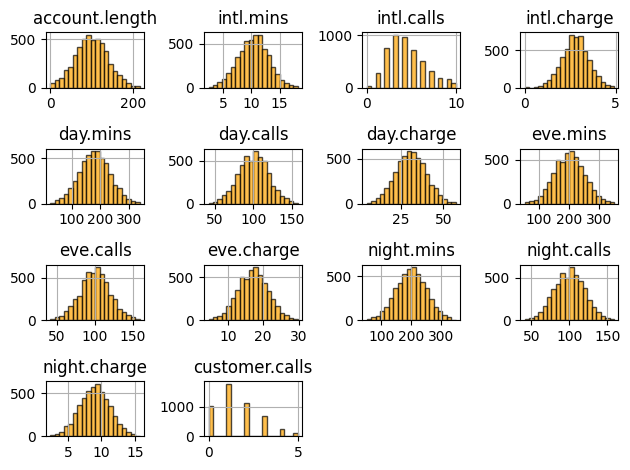

In [20]:

# Select numerical columns from the dataset
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for each numerical column
plt.figure(figsize=(15, 8))  # Set the figure size
data[numerical_columns].hist(bins=20, color='orange', edgecolor='black', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the histograms
plt.show()


### Check correlation between features

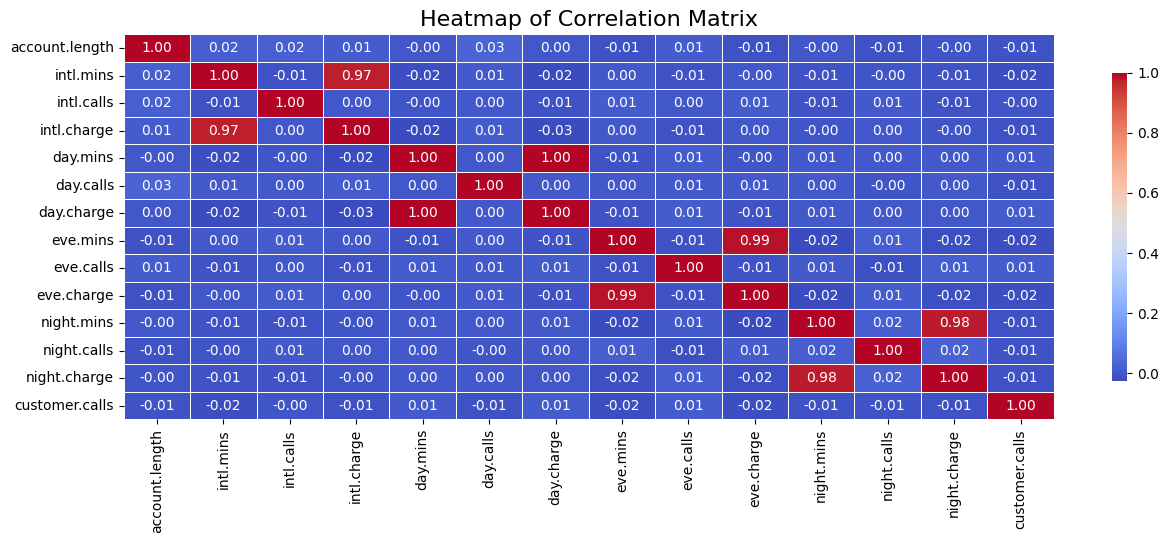

In [21]:
numeric_df = data.select_dtypes(include=['int64','float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the size of the heatmap
plt.figure(figsize=(15, 5))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=0.5, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.show()

In [22]:
data.isnull().sum()

state              0
area.code          0
account.length     0
voice.plan         0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [23]:
data.dropna(inplace=True)

In [24]:
data['charges'] = (data['intl.charge'] + data['day.charge'] + data['night.charge'])/3
data.drop(columns=['intl.charge','day.charge','eve.charge','night.charge'],inplace=True)

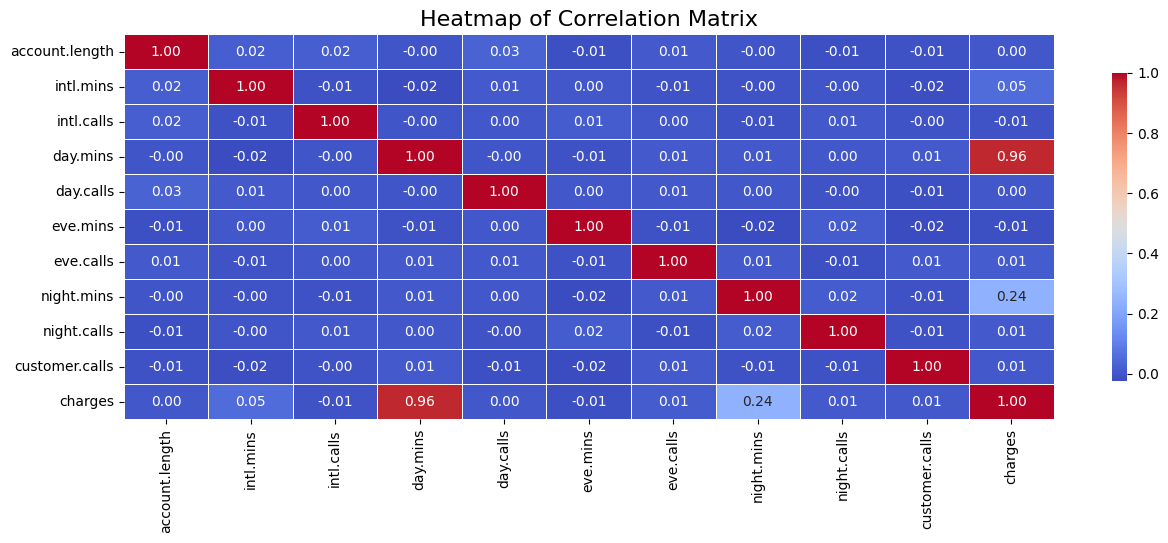

In [25]:
numeric_df = data.select_dtypes(include=['int64','float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the size of the heatmap
plt.figure(figsize=(15, 5))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=0.5, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.show()

In [26]:
data.head()

,state,area.code,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,charges
1,KS,area_code_415,128,yes,no,10.0,3,265.1,110,197.4,99,244.7,91,1,no,19.593333
2,OH,area_code_415,107,yes,no,13.7,3,161.6,123,195.5,103,254.4,103,1,no,14.206667
3,NJ,area_code_415,137,no,no,12.2,5,243.4,114,121.2,110,162.6,104,0,no,17.330000
4,OH,area_code_408,84,no,yes,6.6,7,299.4,71,61.9,88,196.9,89,2,no,20.513333
5,OK,area_code_415,75,no,yes,10.1,3,166.7,113,148.3,122,186.9,121,3,no,13.160000


# Model Building

In [27]:

def split_data(data, target_column, test_size=0.2, random_state=42):
    """
    Split the dataset into training and test sets and return the processed train and test data.
    
    Parameters:
    data (DataFrame): The input dataset containing both features and the target column.
    target_column (str): The name of the target column to separate from the features.
    test_size (float, optional): The proportion of the dataset to include in the test split (default is 0.2).
    random_state (int, optional): Controls the shuffling applied to the data before splitting (default is 42).

    Returns:
    train_data (DataFrame): The training dataset with the target column reattached.
    test_data (DataFrame): The test dataset with the target column reattached.
    """
    # Separate features and target
    X = data.drop(columns=target_column)
    y = data[target_column]

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Add the target column back to both training and test sets
    X_train[target_column] = y_train
    X_test[target_column] = y_test

    # Reset the indices for train and test data
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)

    return X_train, X_test




# PCA

In [28]:

def apply_pca(X, n_components=None):
    """
    Apply PCA to the dataset X (train or test), return the transformed data, 
    the fitted PCA model, and the explained variance ratio.
    
    Parameters:
    X (DataFrame or array-like): The input data (either train or test) for PCA.
    n_components (int or float, optional): Number of components to keep. If None, keep all components.
        - If an int, it specifies the number of components to keep.
        - If a float between 0 and 1, it keeps enough components to explain the variance ratio.
    
    Returns:
    X_pca (DataFrame): The dataset transformed by PCA.
    pca_model (PCA): The fitted PCA model.
    explained_variance_ratio_ (array): The amount of variance explained by each of the selected components.
    """
    # Initialize the PCA model
    pca_model = PCA(n_components=n_components)
    
    # Fit PCA on the data and transform it
    X_pca = pca_model.fit_transform(X)
    
    # Convert the transformed data back to a DataFrame with component labels
    component_labels = [f'PC{i+1}' for i in range(X_pca.shape[1])]
    X_pca_df = pd.DataFrame(X_pca, columns=component_labels)
    
    # Return the transformed data, the fitted PCA model, and the explained variance ratio
    return X_pca_df, pca_model, pca_model.explained_variance_ratio_

# Example usage for train set:
# X_train_pca, pca_model, explained_variance_train = apply_pca(X_train, n_components=2)

# Example usage for test set (using the trained pca_model from the training set):
# X_test_pca = pd.DataFrame(pca_model.transform(X_test), columns=[f'PC{i+1}' for i in range(X_test.shape[1])])


# Using Logistic Regression

In [29]:
train_data, test_data = split_data(data, target_column='churn', test_size=0.2)

In [30]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features in the training data
train_data['churn'] = label_encoder.fit_transform(train_data['churn'])
train_data['voice.plan'] = label_encoder.fit_transform(train_data['voice.plan'])
train_data['intl.plan'] = label_encoder.fit_transform(train_data['intl.plan'])

# Drop unnecessary columns from the training data
train_data.drop(columns=['area.code', 'state'], inplace=True)

# Display the first few rows of the processed training data
train_data.head()


,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,charges,churn
0,72,0,0,12.7,2,272.4,88,107.9,125,185.5,81,0,19.363333,0
1,185,0,0,16.6,3,158.5,93,294.7,69,146.2,116,0,12.670000,0
2,65,1,0,8.8,5,215.5,129,161.9,77,128.3,91,2,14.930000,0
3,150,0,0,8.3,4,150.9,92,191.0,106,223.6,107,5,12.650000,1
4,70,1,0,9.8,4,249.5,101,259.7,98,222.7,68,1,18.363333,0


In [31]:
X_train = train_data.drop(columns='churn')
y_train = train_data['churn']

In [32]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the features
X_train = scaler.fit_transform(X_train)


In [33]:
X_train, pca, varience = apply_pca(X_train)

In [34]:
varience

array([0.15392308, 0.08354661, 0.08136943, 0.07989073, 0.07850472,
       0.07655825, 0.07616095, 0.07576134, 0.07504069, 0.07459064,
       0.07332439, 0.07099158, 0.00033759])

In [35]:

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [36]:
test_data.head()

,state,area.code,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,charges,churn
0,WA,area_code_415,103,no,no,10.4,3,204.9,107,135.2,102,208.2,106,5,15.670000,no
1,WV,area_code_415,57,no,no,9.1,2,167.1,103,188.4,112,111.4,74,1,11.960000,no
2,MD,area_code_415,79,no,no,7.9,4,213.4,107,176.2,82,180.1,125,0,15.503333,no
3,IL,area_code_408,145,no,no,9.8,4,137.3,94,232.4,87,206.0,105,1,11.753333,no
4,MA,area_code_408,101,no,no,11.1,6,189.0,122,179.2,91,186.8,124,0,14.513333,no


In [37]:
# Transform categorical columns in the test data using the fitted label encoder
test_data['churn'] = label_encoder.transform(test_data['churn'])
test_data['voice.plan'] = label_encoder.transform(test_data['voice.plan'])
test_data['intl.plan'] = label_encoder.transform(test_data['intl.plan'])

# Drop unnecessary columns from the test data
test_data.drop(columns=['area.code', 'state'], inplace=True)

# Prepare features and target variable for the test set
X_test = test_data.drop(columns='churn')
y_test = test_data['churn']

# Standardize the features in the test set
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Display the first few rows of the modified test data
test_data.head()


,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,charges,churn
0,103,0,0,10.4,3,204.9,107,135.2,102,208.2,106,5,15.670000,0
1,57,0,0,9.1,2,167.1,103,188.4,112,111.4,74,1,11.960000,0
2,79,0,0,7.9,4,213.4,107,176.2,82,180.1,125,0,15.503333,0
3,145,0,0,9.8,4,137.3,94,232.4,87,206.0,105,1,11.753333,0
4,101,0,0,11.1,6,189.0,122,179.2,91,186.8,124,0,14.513333,0


In [38]:
X_test = pca.transform(X_test)

In [39]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       833
           1       0.61      0.16      0.25       161

    accuracy                           0.85       994
   macro avg       0.73      0.57      0.58       994
weighted avg       0.82      0.85      0.81       994



C:\Users\abhij\anaconda3\envs\tf_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [40]:

from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc,
    precision_recall_curve
)

def plot_classification_chart(y_true, y_pred, y_pred_proba=None, plot_type="confusion"):
    """
    Plots the selected classification chart.
    
    Parameters:
    - y_true: array-like, true labels
    - y_pred: array-like, predicted labels (for confusion matrix)
    - y_pred_proba: array-like, predicted probabilities (for ROC and precision-recall curves)
    - plot_type: str, type of plot to generate ("confusion", "roc", "precision_recall")
    """
    if plot_type == "confusion":
        # Plot Confusion Matrix
        conf_matrix = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
        disp.plot(cmap="Blues")
        plt.title("Confusion Matrix")
        plt.show()

    elif plot_type == "roc":
        # Check if predicted probabilities are provided
        if y_pred_proba is None:
            print("Error: y_pred_proba is required for ROC curve.")
            return
        
        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver Operating Characteristic (ROC) Curve")
        plt.legend()
        plt.show()

    elif plot_type == "precision_recall":
        # Check if predicted probabilities are provided
        if y_pred_proba is None:
            print("Error: y_pred_proba is required for Precision-Recall curve.")
            return
        
        # Plot Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
        plt.plot(recall, precision, marker='.', color="purple")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title("Precision-Recall Curve")
        plt.show()

    else:
        print("Invalid plot_type. Choose from 'confusion', 'roc', or 'precision_recall'.")


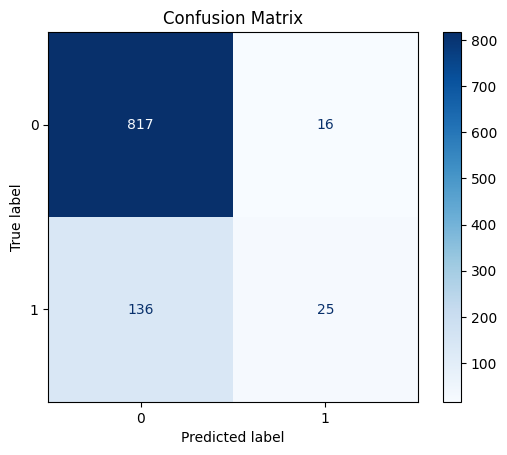

In [41]:
plot_classification_chart(y_test,y_pred)

# XGBoost

In [42]:
train_data, test_data = split_data(data, target_column='churn', test_size=0.2)

In [43]:

# Initialize encoders
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns in the training data
train_data['churn'] = label_encoder.fit_transform(train_data['churn'])
train_data['voice.plan'] = label_encoder.fit_transform(train_data['voice.plan'])
train_data['intl.plan'] = label_encoder.fit_transform(train_data['intl.plan'])

# Optional: One-hot encode 'area.code' and 'state' columns (currently commented out)
# encoded_array = one_hot_encoder.fit_transform(train_data[['area.code', 'state']])
# encoded_data = pd.DataFrame(encoded_array, columns=one_hot_encoder.get_feature_names_out(['area.code', 'state']))
# train_data = pd.concat([train_data[['account.length', 'voice.plan', 'intl.plan',
#        'intl.mins', 'intl.calls', 'day.mins', 'day.calls', 'eve.mins',
#        'eve.calls', 'night.mins', 'night.calls', 'customer.calls', 'churn']], encoded_data], axis=1)

# Drop unnecessary columns
train_data.drop(columns=['area.code', 'state'], inplace=True)

# Display the first few rows of the modified training data
train_data.head()


,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,charges,churn
0,72,0,0,12.7,2,272.4,88,107.9,125,185.5,81,0,19.363333,0
1,185,0,0,16.6,3,158.5,93,294.7,69,146.2,116,0,12.670000,0
2,65,1,0,8.8,5,215.5,129,161.9,77,128.3,91,2,14.930000,0
3,150,0,0,8.3,4,150.9,92,191.0,106,223.6,107,5,12.650000,1
4,70,1,0,9.8,4,249.5,101,259.7,98,222.7,68,1,18.363333,0


In [44]:
# Split the training data into features (X) and target variable (y)
X_train = train_data.drop(columns='churn')  # Features: all columns except 'churn'
y_train = train_data['churn']                # Target variable: 'churn'


In [45]:
# Transform categorical variables in the test dataset using the previously fitted label encoder
test_data['churn'] = label_encoder.transform(test_data['churn'])
test_data['voice.plan'] = label_encoder.transform(test_data['voice.plan'])
test_data['intl.plan'] = label_encoder.transform(test_data['intl.plan'])

# Uncomment the lines below to perform one-hot encoding on 'area.code' and 'state' if needed
# encoded_array = one_hot_encoder.fit_transform(test_data[['area.code', 'state']])
# encoded_data = pd.DataFrame(encoded_array, columns=one_hot_encoder.get_feature_names_out(['area.code', 'state']))

# Drop unnecessary columns from the test dataset
test_data.drop(columns=['area.code', 'state'], inplace=True)

# Display the first few rows of the transformed test dataset
test_data.head()


,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,charges,churn
0,103,0,0,10.4,3,204.9,107,135.2,102,208.2,106,5,15.670000,0
1,57,0,0,9.1,2,167.1,103,188.4,112,111.4,74,1,11.960000,0
2,79,0,0,7.9,4,213.4,107,176.2,82,180.1,125,0,15.503333,0
3,145,0,0,9.8,4,137.3,94,232.4,87,206.0,105,1,11.753333,0
4,101,0,0,11.1,6,189.0,122,179.2,91,186.8,124,0,14.513333,0


In [46]:
X_test = test_data.drop(columns='churn')
y_test = test_data['churn']

In [47]:
X_train, pca, varience = apply_pca(X_train)
X_test = pca.transform(X_test)

In [48]:

# Create and train the XGBoost classifier
model = XGBClassifier(eval_metric='logloss',max_depth=3,max_leaves=10)  # Removed use_label_encoder
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       833
           1       0.95      0.68      0.79       161

    accuracy                           0.94       994
   macro avg       0.94      0.83      0.88       994
weighted avg       0.94      0.94      0.94       994



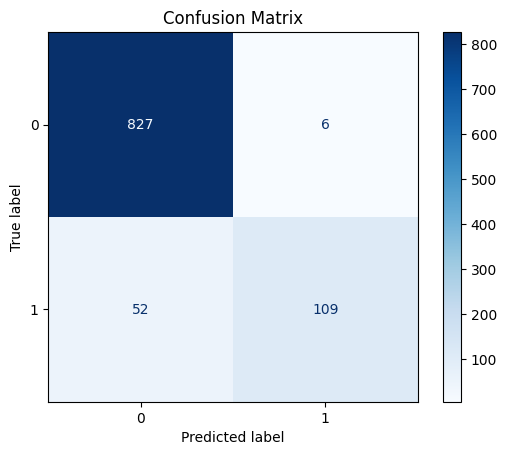

In [49]:
plot_classification_chart(y_test,y_pred)

In [50]:
# Make predictions on the training set
y_pred_train = model.predict(X_train)
report_train = classification_report(y_train, y_pred_train)
print(report_train)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3431
           1       1.00      0.84      0.91       544

    accuracy                           0.98      3975
   macro avg       0.99      0.92      0.95      3975
weighted avg       0.98      0.98      0.98      3975



In [51]:
# Initialize the XGBoost classifier
model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Set up the GridSearchCV for hyperparameter optimization
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=3,  # 3-fold cross-validation
    verbose=1  # Verbosity level
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Extract the best model from the grid search
best_model = grid_search.best_estimator_

# Optionally, display the best parameters found
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 192 candidates, totalling 576 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [52]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       833
           1       0.96      0.67      0.79       161

    accuracy                           0.94       994
   macro avg       0.95      0.83      0.88       994
weighted avg       0.94      0.94      0.94       994



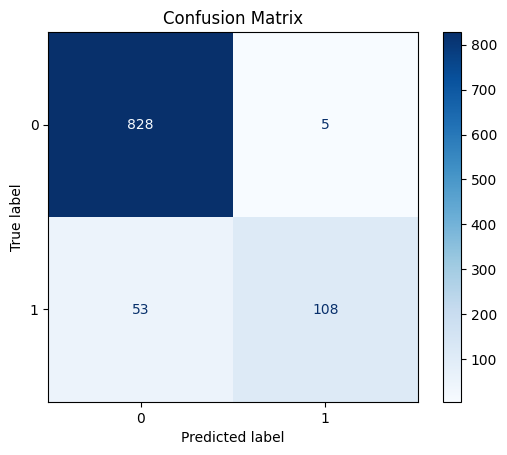

In [53]:
plot_classification_chart(y_test,y_pred)

In [54]:
# Make predictions on the test set
y_pred = best_model.predict(X_train)

# Generate and print the classification report
report = classification_report(y_train, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3431
           1       1.00      1.00      1.00       544

    accuracy                           1.00      3975
   macro avg       1.00      1.00      1.00      3975
weighted avg       1.00      1.00      1.00      3975



In [55]:
X_train.shape

(3975, 13)

# Best Model Now

In [56]:
train_data, test_data = split_data(data, target_column='churn', test_size=0.2)

# Label encoding for the training data
label_encoder = LabelEncoder()
train_data['churn'] = label_encoder.fit_transform(train_data['churn'])
train_data['voice.plan'] = label_encoder.fit_transform(train_data['voice.plan'])
train_data['intl.plan'] = label_encoder.fit_transform(train_data['intl.plan'])

# Dropping unnecessary columns
train_data.drop(columns=['area.code', 'state'], inplace=True)

# Preparing training data
X_train = np.array(train_data.drop(columns='churn'))
y_train = np.array(train_data['churn'])

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Applying Random Oversampling to handle class imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Reshaping the data for LSTM input
X_train_reshaped = X_resampled.reshape((X_resampled.shape[0], 1, X_resampled.shape[1]))

# Initialize the LSTM model
model = Sequential()

# Modify input_shape to (1, 13) to match 13 features
model.add(LSTM(100, input_shape=(1, 13), return_sequences=True))

model.add(LSTM(50, return_sequences=True))
model.add(LSTM(25, return_sequences=True))
model.add(LSTM(12, return_sequences=True))
model.add(LSTM(2))

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))  # 1 unit for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_resampled, epochs=30, batch_size=64)


# Label encoding for the test data
test_data['churn'] = label_encoder.fit_transform(test_data['churn'])
test_data['voice.plan'] = label_encoder.fit_transform(test_data['voice.plan'])
test_data['intl.plan'] = label_encoder.fit_transform(test_data['intl.plan'])

# Dropping unnecessary columns from test data
test_data.drop(columns=['area.code', 'state'], inplace=True)

# Preparing test data
X_test = np.array(test_data.drop(columns='churn'))
y_test = np.array(test_data['churn'])

# Standardizing test data
X_test = scaler.transform(X_test)

# Reshaping test data for LSTM
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Making predictions on the test set
y_pred = model.predict(X_test_reshaped)

# Converting predicted probabilities to class labels
y_pred_class = (y_pred >= 0.5).astype(int)

# Generating the classification report
print(classification_report(y_test, y_pred_class))


Epoch 1/30
108/108 [==============================] - 12s 10ms/step - loss: 0.6625 - accuracy: 0.6637
Epoch 2/30
108/108 [==============================] - 1s 12ms/step - loss: 0.5049 - accuracy: 0.8396
Epoch 3/30
108/108 [==============================] - 1s 12ms/step - loss: 0.4119 - accuracy: 0.8674
Epoch 4/30
108/108 [==============================] - 1s 12ms/step - loss: 0.3808 - accuracy: 0.8737
Epoch 5/30
108/108 [==============================] - 1s 12ms/step - loss: 0.3667 - accuracy: 0.8795
Epoch 6/30
108/108 [==============================] - 1s 12ms/step - loss: 0.3628 - accuracy: 0.8796
Epoch 7/30
108/108 [==============================] - 1s 12ms/step - loss: 0.3557 - accuracy: 0.8833
Epoch 8/30
108/108 [==============================] - 1s 12ms/step - loss: 0.3540 - accuracy: 0.8840
Epoch 9/30
108/108 [==============================] - 1s 12ms/step - loss: 0.3501 - accuracy: 0.8863
Epoch 10/30
108/108 [==============================] - 1s 12ms/step - loss: 0.3485 - accur

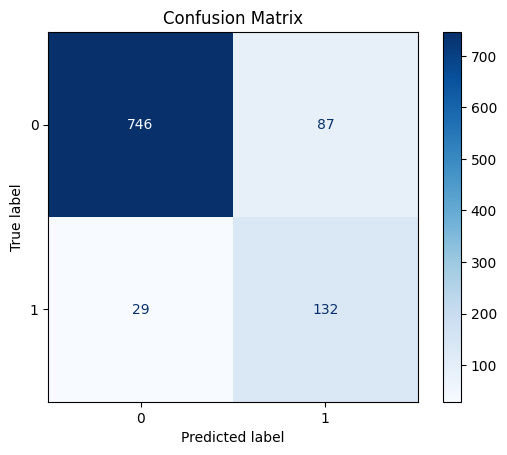

In [57]:
plot_classification_chart(y_test,y_pred_class)

# Using LSTM Deep Learning Algorithm

In [58]:
train_data, test_data = split_data(data, target_column='churn', test_size=0.2,random_state=42)
train_data.head()

,state,area.code,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,charges,churn
0,AZ,area_code_510,72,no,no,12.7,2,272.4,88,107.9,125,185.5,81,0,19.363333,no
1,AL,area_code_415,185,no,no,16.6,3,158.5,93,294.7,69,146.2,116,0,12.670000,no
2,RI,area_code_415,65,yes,no,8.8,5,215.5,129,161.9,77,128.3,91,2,14.930000,no
3,MA,area_code_408,150,no,no,8.3,4,150.9,92,191.0,106,223.6,107,5,12.650000,yes
4,GA,area_code_415,70,yes,no,9.8,4,249.5,101,259.7,98,222.7,68,1,18.363333,no


In [59]:
def preprocess_training_data(train_data):
    """
    Preprocess the training data by encoding categorical features and dropping unnecessary columns.

    Parameters:
    train_data (DataFrame): The training dataset to preprocess.

    Returns:
    DataFrame, dict: The processed training dataset and encoders dictionary.
    """
    # Initialize encoders for categorical features
    voice_plan_encoder = LabelEncoder()
    intl_plan_encoder = LabelEncoder()
    churn_encoder = LabelEncoder()
    
    # Encode each categorical feature with its specific encoder
    train_data['voice.plan'] = voice_plan_encoder.fit_transform(train_data['voice.plan'])
    train_data['intl.plan'] = intl_plan_encoder.fit_transform(train_data['intl.plan'])
    train_data['churn'] = churn_encoder.fit_transform(train_data['churn'])

    # Standardize numerical features
    scaler = StandardScaler()
    numeric_features = ['account.length', 'intl.mins', 'intl.calls', 'day.mins', 
                        'day.calls', 'eve.mins', 'eve.calls', 'night.mins', 'night.calls', 'customer.calls']
#     train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])

    # Drop unnecessary columns
    columns_to_drop = ['area.code', 'state', 'charges']
    train_data.drop(columns=columns_to_drop, inplace=True)

    # Store encoders and scaler
    objects_to_save = {
        'voice_plan_encoder': voice_plan_encoder,
        'intl_plan_encoder': intl_plan_encoder,
        'churn_encoder': churn_encoder,
#         'scaler': scaler,
        # 'model': model  # Uncomment and add your model here if you want to include it
    }

    return train_data, objects_to_save

# Assume `train_data` is your DataFrame
train_data_processed, objects_to_save = preprocess_training_data(train_data)

# Save the processed data and encoders as a pickle file
with open('model_and_encoders.pkl', 'wb') as file:
    pickle.dump(objects_to_save, file)

# Display the first few rows of the processed training data
train_data_processed.head()


,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn
0,72,0,0,12.7,2,272.4,88,107.9,125,185.5,81,0,0
1,185,0,0,16.6,3,158.5,93,294.7,69,146.2,116,0,0
2,65,1,0,8.8,5,215.5,129,161.9,77,128.3,91,2,0
3,150,0,0,8.3,4,150.9,92,191.0,106,223.6,107,5,1
4,70,1,0,9.8,4,249.5,101,259.7,98,222.7,68,1,0


In [60]:
# Display summary information about the training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account.length  3975 non-null   int64  
 1   voice.plan      3975 non-null   int32  
 2   intl.plan       3975 non-null   int32  
 3   intl.mins       3975 non-null   float64
 4   intl.calls      3975 non-null   int64  
 5   day.mins        3975 non-null   float64
 6   day.calls       3975 non-null   int64  
 7   eve.mins        3975 non-null   float64
 8   eve.calls       3975 non-null   int64  
 9   night.mins      3975 non-null   float64
 10  night.calls     3975 non-null   int64  
 11  customer.calls  3975 non-null   int64  
 12  churn           3975 non-null   int32  
dtypes: float64(4), int32(3), int64(6)
memory usage: 357.3 KB


In [61]:

# Assuming train_data is your DataFrame containing the training data
X_train = np.array(train_data.drop(columns='churn'))  # Features
y_train = np.array(train_data['churn'])                 # Target variable


In [62]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (3975, 12)
Shape of y_train: (3975,)


In [63]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Optionally, if you plan to scale the test data later, you can store the scaler
# for consistent scaling:
# X_test_scaled = scaler.transform(X_test)


In [64]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=4)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


# from imblearn.over_sampling import RandomOverSampler

# # Apply Random Oversampling
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


# from imblearn.under_sampling import RandomUnderSampler

# # Apply Random Undersampling
# rus = RandomUnderSampler(random_state=2)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


# from imblearn.combine import SMOTETomek

# # Apply SMOTE + Tomek Links for combined oversampling and undersampling
# smote_tomek = SMOTETomek(random_state=42)
# X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# from imblearn.combine import SMOTEENN

# # Apply SMOTE + ENN
# smote_enn = SMOTEENN(random_state=42)
# X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)


In [65]:
X_train_reshaped =X_resampled.reshape((X_resampled.shape[0], 1, X_resampled.shape[1]))


In [66]:

# Initialize the LSTM model
model = Sequential()

# Add LSTM layer
model.add(LSTM(100, input_shape=(1, 12),return_sequences=True))  # 100 LSTM units, (1 timestep, 13 features)

model.add(LSTM(50,return_sequences=True))

model.add(LSTM(25,return_sequences=True))

model.add(LSTM(12,return_sequences=True))

# model.add(LSTM(6,return_sequences=True))

# model.add(LSTM(3,return_sequences=True))

model.add(LSTM(2))

# Add output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))  # Output layer (1 unit for binary classification)

# Compile the model using binary crossentropy and Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy'
              , metrics=['accuracy'])


In [67]:
# Fit the model on the data
model.fit(X_train_reshaped, y_resampled, epochs=50, batch_size=100)


Epoch 1/50
69/69 [==============================] - 13s 12ms/step - loss: 0.6846 - accuracy: 0.6309
Epoch 2/50
69/69 [==============================] - 1s 14ms/step - loss: 0.5700 - accuracy: 0.7877
Epoch 3/50
69/69 [==============================] - 1s 14ms/step - loss: 0.4699 - accuracy: 0.8547
Epoch 4/50
69/69 [==============================] - 1s 14ms/step - loss: 0.4036 - accuracy: 0.8726
Epoch 5/50
69/69 [==============================] - 1s 14ms/step - loss: 0.3692 - accuracy: 0.8777
Epoch 6/50
69/69 [==============================] - 1s 14ms/step - loss: 0.3526 - accuracy: 0.8809
Epoch 7/50
69/69 [==============================] - 1s 14ms/step - loss: 0.3389 - accuracy: 0.8853
Epoch 8/50
69/69 [==============================] - 1s 14ms/step - loss: 0.3285 - accuracy: 0.8913
Epoch 9/50
69/69 [==============================] - 1s 14ms/step - loss: 0.3219 - accuracy: 0.8927
Epoch 10/50
69/69 [==============================] - 1s 14ms/step - loss: 0.3143 - accuracy: 0.8945
Epoch 11

In [68]:

# Load the existing pickle file
with open('model_and_encoders.pkl', 'rb') as file:
    data_to_save = pickle.load(file)

# Assuming 'model' and 'scaler' are your trained model and scaler objects
data_to_save['model'] = model  # Add your trained model to the dictionary
data_to_save['scaler'] = scaler  # Add the scaler to the dictionary

# Save the updated dictionary back to the pickle file
with open('model_and_encoders.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

print("Model and scaler successfully added to the pickle file.")


Model and scaler successfully added to the pickle file.


In [69]:
with open('model_and_encoders.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

# Access each object
voice_plan_encoder = loaded_data['voice_plan_encoder']
intl_plan_encoder = loaded_data['intl_plan_encoder']
churn_encoder = loaded_data['churn_encoder']
scaler = loaded_data['scaler']
model = loaded_data['model']


In [70]:
# Apply label encoding to categorical columns in the test dataset
test_data['churn'] = churn_encoder.transform(test_data['churn'])
test_data['voice.plan'] = voice_plan_encoder.transform(test_data['voice.plan'])
test_data['intl.plan'] = intl_plan_encoder.transform(test_data['intl.plan'])

# Drop unnecessary columns that are not needed for modeling
test_data.drop(columns=['area.code', 'state','charges'], inplace=True)

# Display the first few rows of the processed test dataset for verification
test_data.head()


,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn
0,103,0,0,10.4,3,204.9,107,135.2,102,208.2,106,5,0
1,57,0,0,9.1,2,167.1,103,188.4,112,111.4,74,1,0
2,79,0,0,7.9,4,213.4,107,176.2,82,180.1,125,0,0
3,145,0,0,9.8,4,137.3,94,232.4,87,206.0,105,1,0
4,101,0,0,11.1,6,189.0,122,179.2,91,186.8,124,0,0


In [71]:
X_test = np.array(test_data.drop(columns='churn'))
y_test = np.array(test_data['churn'])

In [72]:
X_test.shape

(994, 12)

In [73]:
X_test = scaler.transform(X_test)

In [74]:
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
y_pred = model.predict(X_test_reshaped)

32/32 [==============================] - 2s 4ms/step


In [75]:

# Convert predicted probabilities to class labels (0 or 1) based on a threshold of 0.5
y_pred_class = (y_pred >= 0.5).astype(int)

# Now generate the classification report using the predicted class labels
print(classification_report(y_test, y_pred_class))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       833
           1       0.78      0.75      0.76       161

    accuracy                           0.92       994
   macro avg       0.86      0.85      0.86       994
weighted avg       0.92      0.92      0.92       994



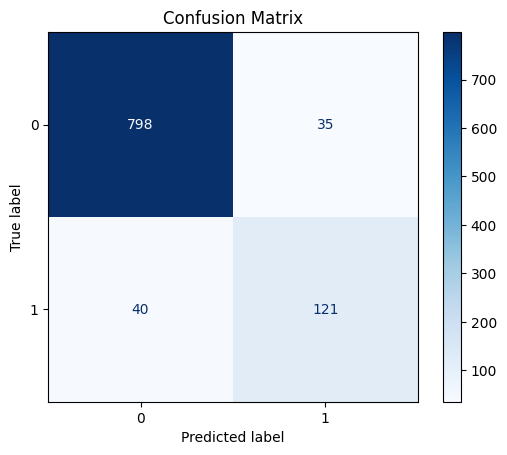

In [76]:
plot_classification_chart(y_test,y_pred_class)

In [80]:
data[data['churn']=='no']

,state,area.code,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,charges
1,KS,area_code_415,128,yes,no,10.0,3,265.1,110,197.4,99,244.7,91,1,no,19.593333
2,OH,area_code_415,107,yes,no,13.7,3,161.6,123,195.5,103,254.4,103,1,no,14.206667
3,NJ,area_code_415,137,no,no,12.2,5,243.4,114,121.2,110,162.6,104,0,no,17.330000
4,OH,area_code_408,84,no,yes,6.6,7,299.4,71,61.9,88,196.9,89,2,no,20.513333
5,OK,area_code_415,75,no,yes,10.1,3,166.7,113,148.3,122,186.9,121,3,no,13.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NC,area_code_408,75,no,no,6.9,7,170.7,101,193.1,126,129.1,104,1,no,12.230000
4996,HI,area_code_408,50,yes,no,9.9,5,235.7,127,223.0,126,297.5,116,2,no,18.710000
4998,DC,area_code_415,61,no,no,13.6,4,140.6,89,172.8,128,212.4,97,1,no,12.376667
4999,DC,area_code_510,109,no,no,8.5,6,188.8,67,171.7,92,224.4,89,0,no,14.833333
